In [ ]:
----------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
url = '/content/drive/MyDrive/Water_Quality/water_potability.csv'  # Update this with your dataset path or URL
data = pd.read_csv(url)

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

In [ ]:
# Handle missing values
data = data.dropna()

# Separate features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

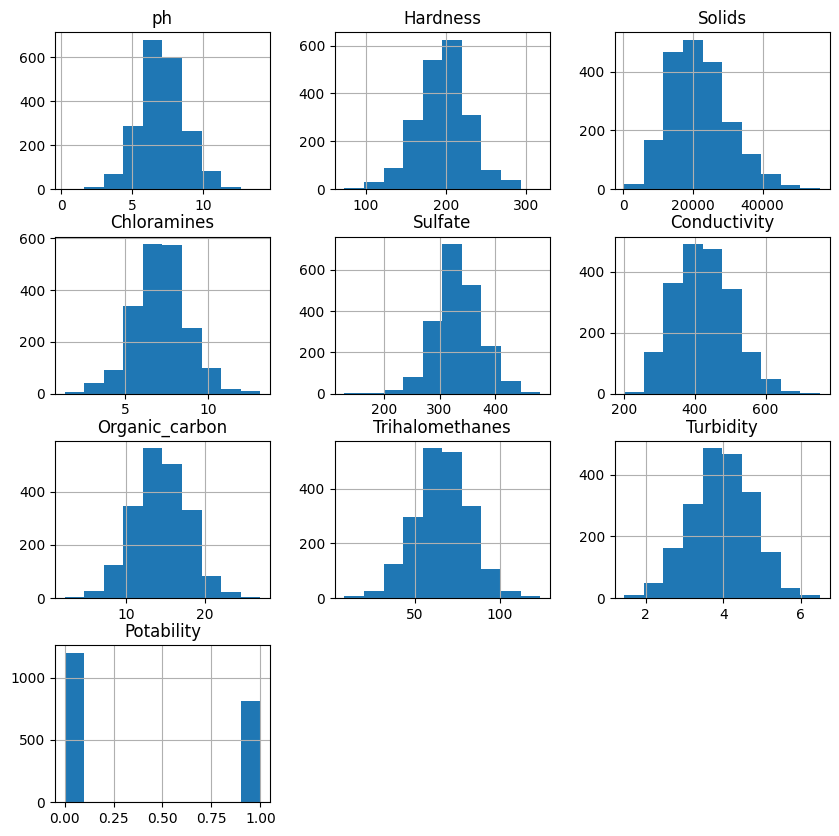

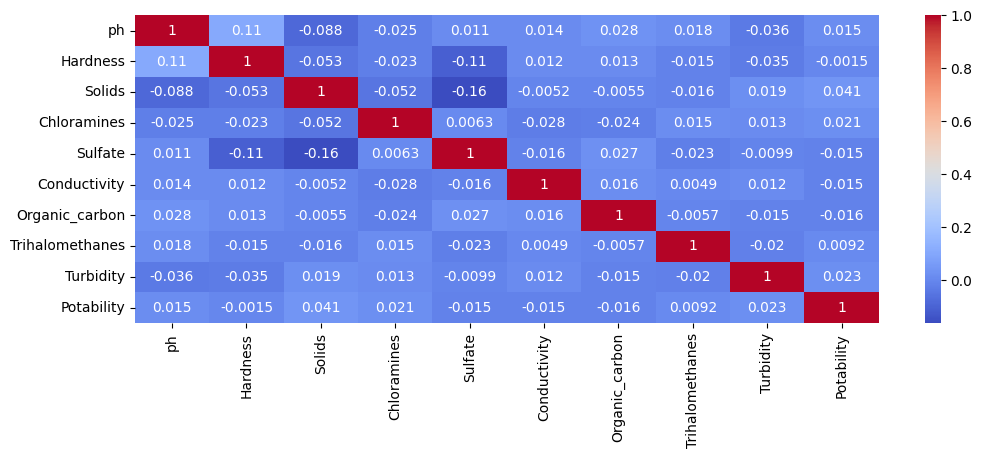

In [ ]:
# Feature distributions
data.hist(figsize=(10, 10))
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5271 - loss: 0.7412 - val_accuracy: 0.6118 - val_loss: 0.6787
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5327 - loss: 0.7358 - val_accuracy: 0.6025 - val_loss: 0.6717
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5461 - loss: 0.7048 - val_accuracy: 0.6242 - val_loss: 0.6669
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 0.6829 - val_accuracy: 0.6180 - val_loss: 0.6628
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5977 - loss: 0.6952 - val_accuracy: 0.6366 - val_loss: 0.6609
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5734 - loss: 0.6755 - val_accuracy: 0.6366 - val_loss: 0.6583
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5784 - loss: 0.6818 - val_accuracy: 0.6366 - val_loss: 0.6567
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 0.6476 - val_accuracy: 0.6335 - val_loss: 0.6551
Epo

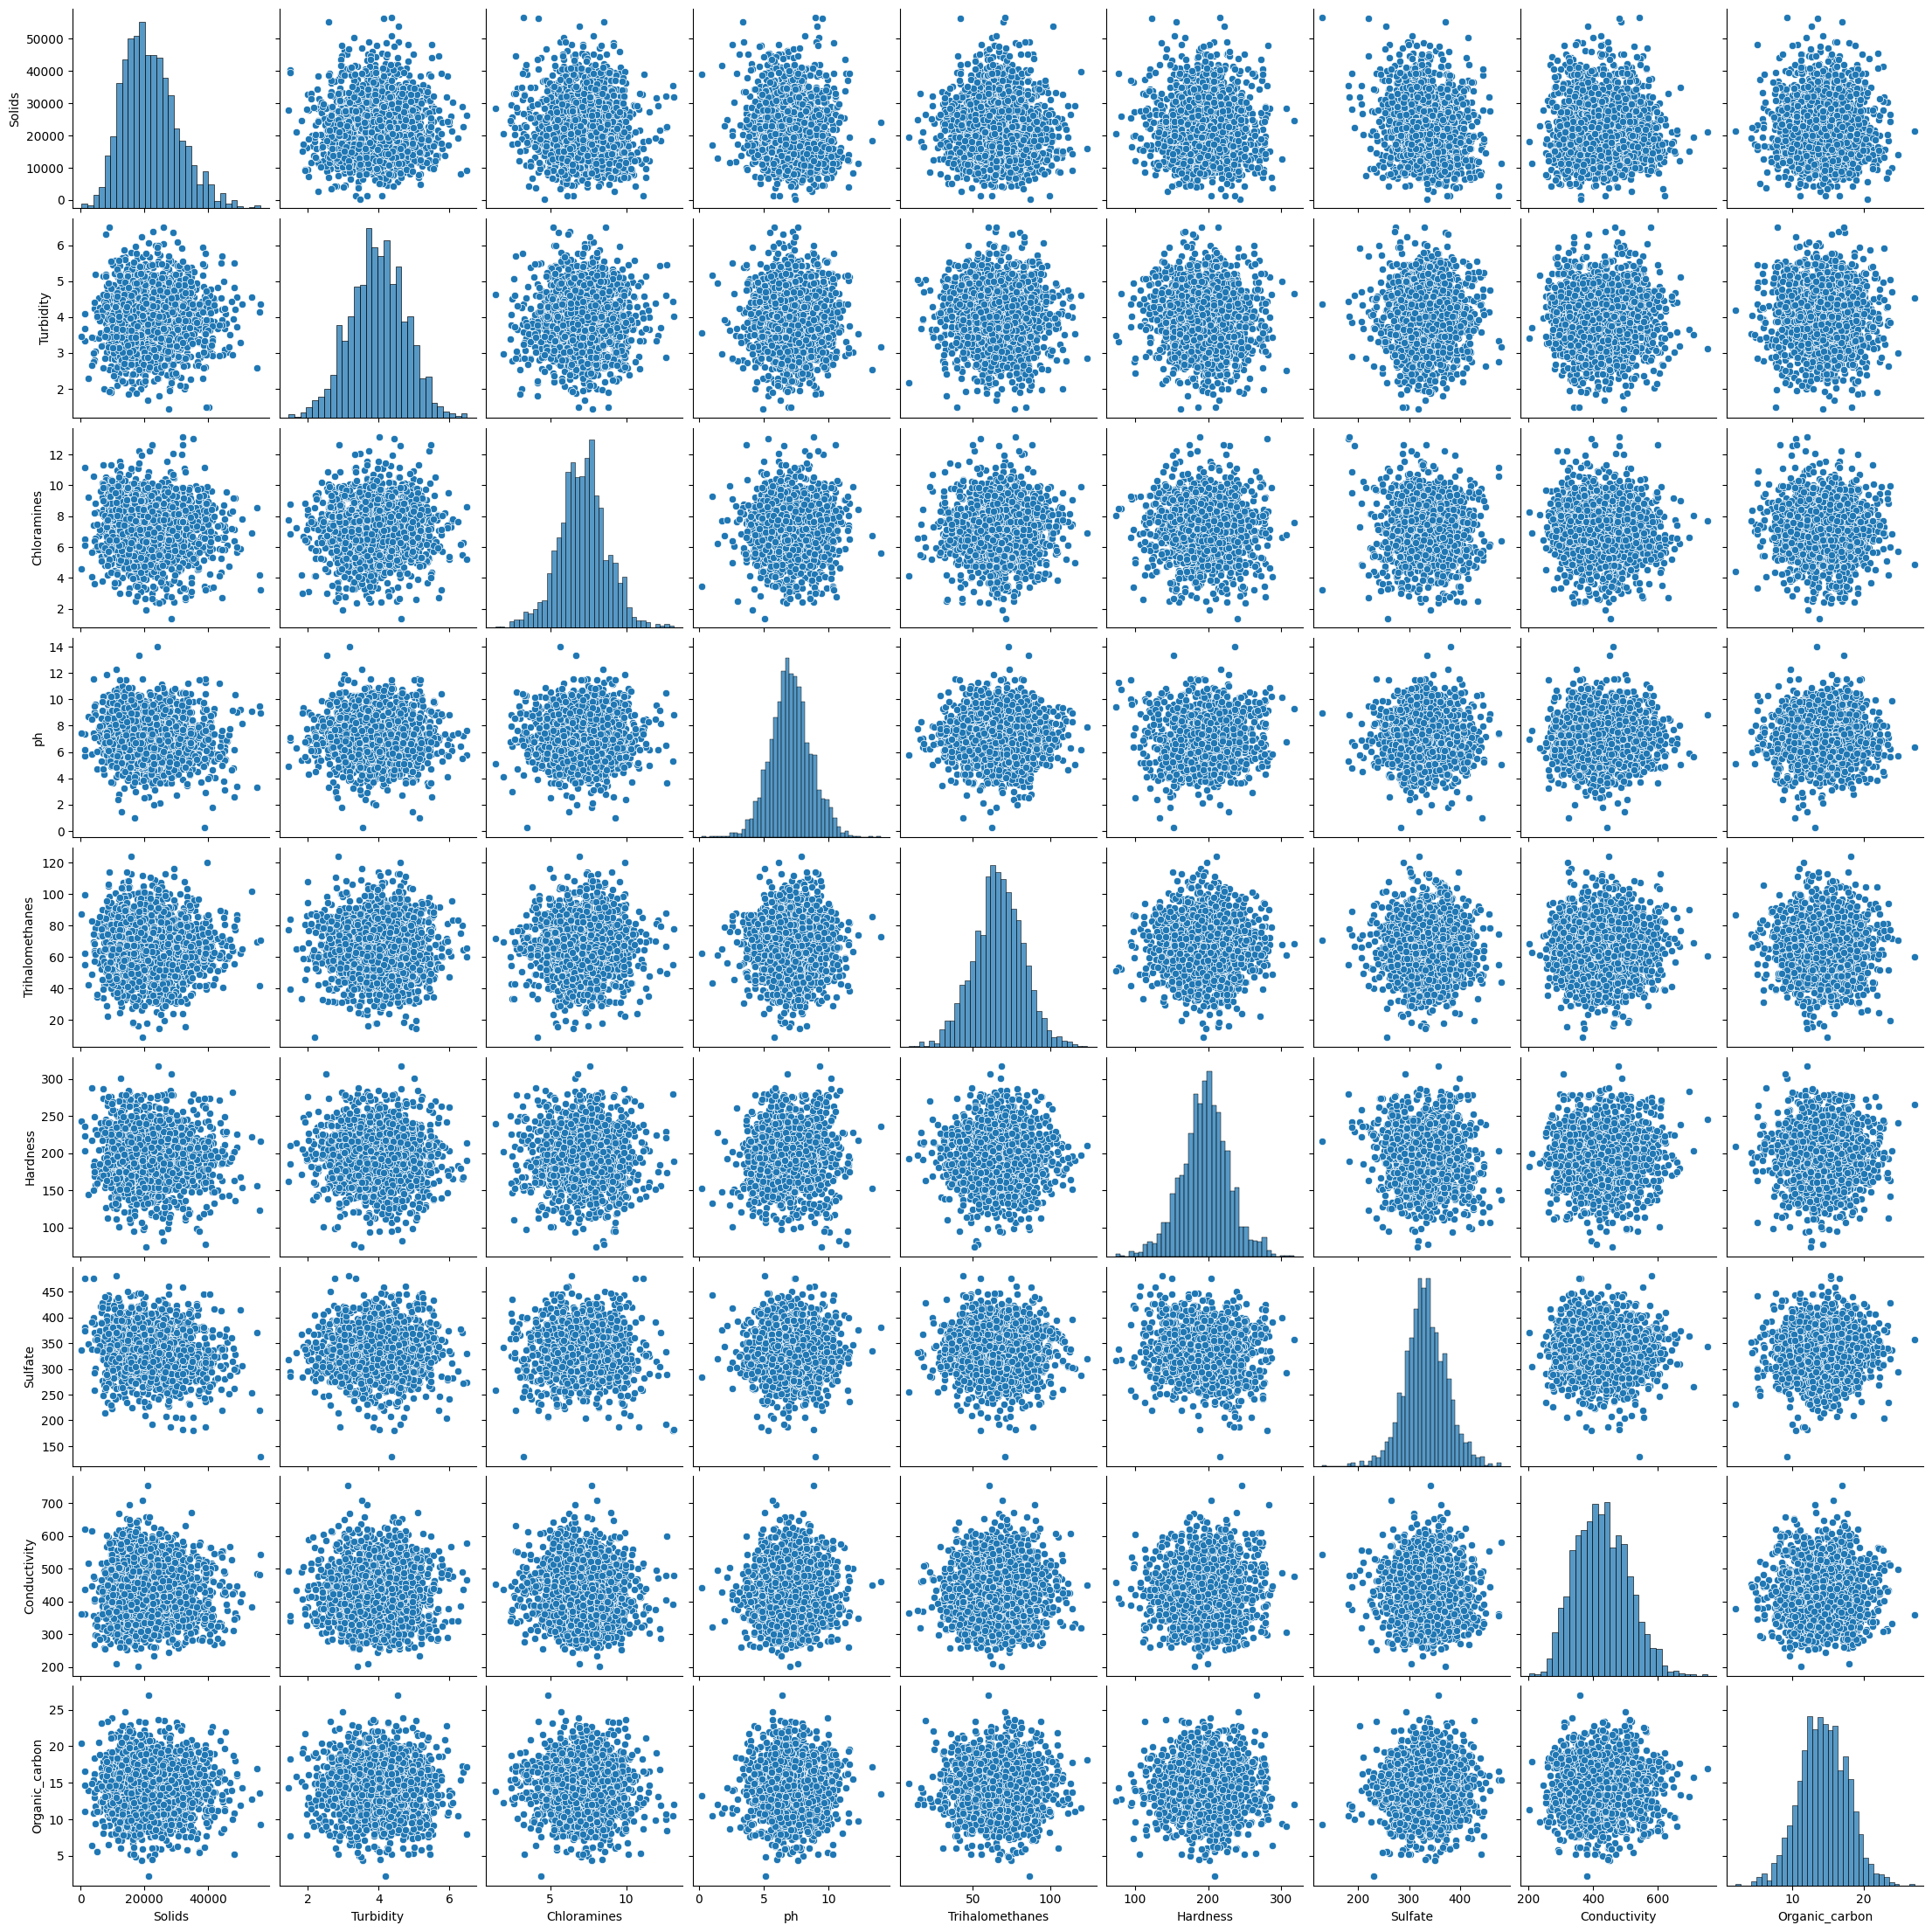

In [ ]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       231
           1       0.71      0.44      0.54       172

    accuracy                           0.68       403
   macro avg       0.69      0.65      0.65       403
weighted avg       0.69      0.68      0.66       403



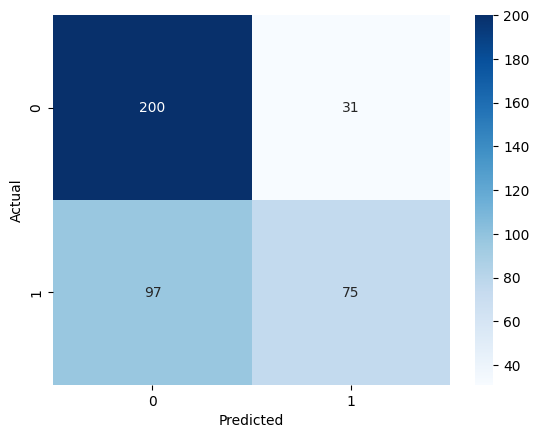

Accuracy: 0.6823821339950372


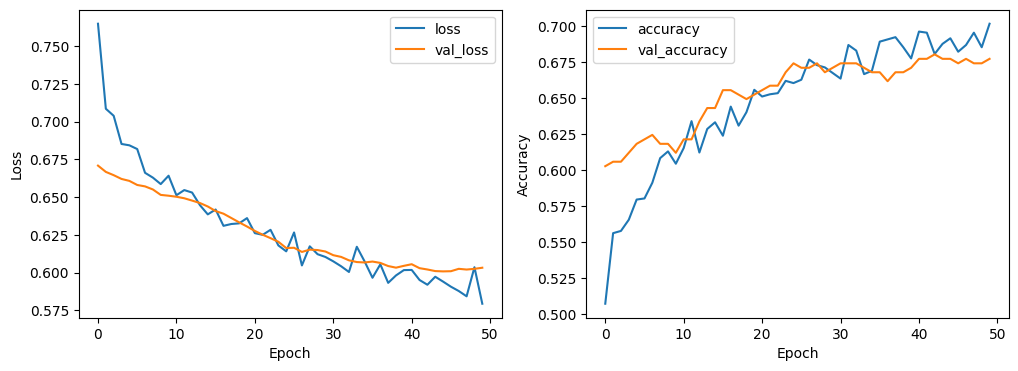

In [ ]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()